In [25]:
import matplotlib.pyplot as plt
import re

In [26]:
n_hidden = 2
n_open = 2

tr1 = tr = [[0.999, 0.001], [0.01, 0.99]]
init = [0.996, 0.004]
tr = [[0.999, 0.001], [0.01, 0.99]]
em = [[0.582, 0.418], [0.338, 0.662]]

o_id = {
    'A': 0,
    'C': 1,
    'G': 1,
    'T': 0
    }

tr_trained10 = [[0.9999557195293833, 4.428047061661027e-05],
 [0.004384737382218491, 0.9956152626177815]]

In [27]:
v = [[init[i]] for i in range(n_hidden)]
v
prev = [[] for i in range(n_hidden)]
prev

[[], []]

In [28]:
fa = open('cholerae.fasta')
next(fa)
data = fa.read()
seq = ''.join(data.split('\n'))
k = 10000
shift = 5000
GC_content = []
begin = []
for i in range(0, len(seq), shift):
    w = seq[i:i+k]
    GC_content.append((w.count('C') + w.count('G')) / len(w))
    begin.append(i)

In [29]:
def find_p(col, i, o):
    max_p = 0, -1
    for h in range(n_hidden):
        # колонка - тек сост
        
        #   |вер было пред сост
        #   |           |вер пер из сост в нашу колонку
        #   |           |            |вер пер из нашей колонки в наш наблюд
        p = v[h][i-1] * tr[h][col] * em[col][o], h
        max_p = max(max_p, p)
    return max_p

In [30]:
def overcount(seq, s):
    return sum(1 for _ in re.finditer('(?=' + s + ')', seq))

In [31]:
def viterbi(i, j, tr, seq):
    ij = overcount(seq, str(i) + str(j))
    print('-'*50)
    print(str(i) + str(j))
    all_c = 0
    for k in range(n_hidden):
        print(str(i) + str(k))
        all_c += overcount(seq, str(i) + str(k))
    new = ij / all_c
    print(new)
    tr[i][j] = new

In [32]:
n_learning = 15
for k in range(n_learning):
    for i, o in enumerate(seq):
        obs = o_id[o]
        ps = []

        for col in range(n_hidden):
            p = find_p(col, i+1, obs)
            prev[col].append(p[1])
            ps.append(p[0])

        p_sum = sum(ps)
        for pi, p in enumerate(ps):
            ps[pi] = p / p_sum

        for col in range(n_hidden):
            v[col].append(ps[col])

    col = max([(v[i][-1], i) for i in range(n_hidden)])[1]
    path = ''
    for i in range(len(seq)-1, -1, -1):
        path += str(col)
        col = prev[col][i]
    path = path[::-1]
    
    for i in range(n_hidden):
        for j in range(n_hidden):
            viterbi(i, j, tr, path)

--------------------------------------------------
00
00
01
0.9999557195293833
--------------------------------------------------
01
00
01
4.428047061661027e-05
--------------------------------------------------
10
10
11
0.004384737382218491
--------------------------------------------------
11
10
11
0.9956152626177815
--------------------------------------------------
00
00
01
0.9999557195293833
--------------------------------------------------
01
00
01
4.428047061661027e-05
--------------------------------------------------
10
10
11
0.004384737382218491
--------------------------------------------------
11
10
11
0.9956152626177815
--------------------------------------------------
00
00
01
0.9999557195293833
--------------------------------------------------
01
00
01
4.428047061661027e-05
--------------------------------------------------
10
10
11
0.004384737382218491
--------------------------------------------------
11
10
11
0.9956152626177815
-------------------------------------

In [33]:
def gc_content(seq):
    return (seq.count('C') + seq.count('G')) / len(seq)

def gc_window(seq, window, shift=None):
    begin = []
    gc = []
    
    if shift is None:
        shift = window // 2

    for i in range(0, len(seq), shift):
        begin.append(i + 1)
        gc.append(gc_content(seq[i : i + window]))
    
    return begin, gc

%matplotlib inline
def plot_gc(seq, window, res, beg, end):
    from operator import itemgetter
    
    gc_rich = list(map(itemgetter(0), 
       filter(itemgetter(1), enumerate(res[beg:end]))))
    
    begin, gc = gc_window(seq[beg:end], window)
    plt.plot(begin, gc)
    plt.scatter(gc_rich, [.55] * len(gc_rich),
                color='r', s=0.2)
    plt.show()

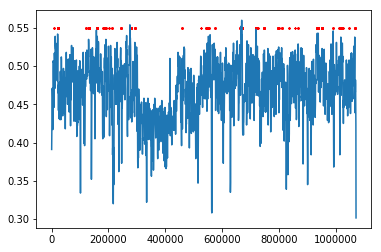

In [34]:
plot_gc(seq, 1000, list(map(int, path)), 0, len(seq))

In [35]:
c11 = sum(1 for _ in re.finditer('(?=11)', path))
c1 = sum(1 for _ in re.finditer('(?=1)', path))
c10 = sum(1 for _ in re.finditer('(?=10)', path))
c01 = sum(1 for _ in re.finditer('(?=01)', path))
c010 = sum(1 for _ in re.finditer('(?=010)', path))

print(c11, c1, c10, c01, c010)

10672 10719 47 47 0


In [36]:
tr

[[0.9999557195293833, 4.428047061661027e-05],
 [0.004384737382218491, 0.9956152626177815]]